In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [87]:
train=pd.read_csv(r"C:\Users\surkanor\Downloads\Participants_Data_FSE\train.csv")
test=pd.read_csv(r"C:\Users\surkanor\Downloads\Participants_Data_FSE\test.csv")

In [3]:
train

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0       2019-01-01 00:00:00         12.5        6.9            0.21      1005   
1       2019-01-01 00:10:00         12.3        6.9            0.21      1005   
2       2019-01-01 00:20:00         12.1        6.9            0.21      1005   
3       2019-01-01 00:30:00         12.0        6.9            0.21      1005   
4       2019-01-01 00:40:00         11.8        6.9            0.21      1005   
...                     ...          ...        ...             ...       ...   
210235  2022-12-31 23:10:00          6.9        5.8            0.21      1009   
210236  2022-12-31 23:20:00          6.8        5.8            0.21      1009   
210237  2022-12-31 23:30:00          6.8        5.8            0.21      1009   
210238  2022-12-31 23:40:00          6.8        5.6            0.21      1009   
210239  2022-12-31 23:50:00          6.8        5.6            0.21      1009   

        Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0                  121         1.0             0             0             0   
1                  122         1.0             0             0             0   
2                  124         1.0             0             0             0   
3                  125         1.0             0             0             0   
4                  126         1.0             0             0             0   
...                ...         ...           ...           ...           ...   
210235              54         1.2             0             0             0   
210236              54         1.2             0             0             0   
210237              55         1.1             0             0             0   
210238              55         1.1             0             0             0   
210239              56         1.1             0             0             0   

        Fill Flag  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0               0  0.258           1              173.92                 1.4   
1               0  0.258           1              171.79                 1.3   
2               0  0.258           1              169.59                 1.3   
3               0  0.258           1              167.37                 1.3   
4               0  0.258           1              165.13                 1.3   
...           ...    ...         ...                 ...                 ...   
210235          0  0.279           4              173.77                 1.8   
210236          0  0.279           7              175.77                 1.8   
210237          0  0.279           7              177.31                 1.8   
210238          0  0.279           7              177.36                 1.8   
210239          0  0.280           7              175.87                 1.8   

        Relative Humidity  
0                   68.82  
1                   69.73  
2                   70.65  
3                   71.11  
4                   71.91  
...                   ...  
210235              92.63  
210236              93.26  
210237              93.26  
210238              91.95  
210239              91.95  

[210240 rows x 16 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [5]:
train.describe()
# study ists statistics to find its min max quartile mean

Temperature      Dew Point  Surface Albedo       Pressure  \
count  210240.000000  210240.000000   210240.000000  210240.000000   
mean       26.795495      13.447805        0.211623     996.856141   
std         8.639162      10.234861        0.020889       7.226820   
min         1.000000     -12.400000        0.170000     978.000000   
25%        20.800000       4.900000        0.200000     990.000000   
50%        27.300000      13.100000        0.200000     997.000000   
75%        32.200000      24.400000        0.230000    1003.000000   
max        48.900000      29.100000        0.260000    1013.000000   

       Wind Direction     Wind Speed   Clearsky DHI   Clearsky DNI  \
count   210240.000000  210240.000000  210240.000000  210240.000000   
mean       209.095453       1.918037      96.720681     225.098992   
std        101.616108       1.194954     120.334380     277.920322   
min          0.000000       0.000000       0.000000       0.000000   
25%        109.000000       1.100000       0.000000       0.000000   
50%        248.000000       1.500000       0.000000       0.000000   
75%        293.000000       2.500000     194.000000     486.000000   
max        360.000000       9.500000     603.000000    1008.000000   

        Clearsky GHI      Fill Flag          Ozone     Cloud Type  \
count  210240.000000  210240.000000  210240.000000  210240.000000   
mean      249.938537       0.288699       0.268813       2.513604   
std       325.049751       1.052178       0.015632       3.093565   
min         0.000000       0.000000       0.217000       0.000000   
25%         0.000000       0.000000       0.259000       0.000000   
50%         0.000000       0.000000       0.270000       1.000000   
75%       533.000000       0.000000       0.279000       6.000000   
max      1053.000000       5.000000       0.351000       9.000000   

       Solar Zenith Angle  Precipitable Water  Relative Humidity  
count       210240.000000       210240.000000      210240.000000  
mean            89.745758            3.377582          53.364443  
std             42.852632            2.261960          29.692608  
min              2.210000            0.300000           4.100000  
25%             53.140000            1.500000          25.540000  
50%             89.400000            2.500000          51.210000  
75%            126.440000            5.700000          80.820000  
max            177.950000            8.900000         100.000000

In [6]:
train.dtypes

Timestamp              object
Temperature           float64
Dew Point             float64
Surface Albedo        float64
Pressure                int64
Wind Direction          int64
Wind Speed            float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Fill Flag               int64
Ozone                 float64
Cloud Type              int64
Solar Zenith Angle    float64
Precipitable Water    float64
Relative Humidity     float64
dtype: object

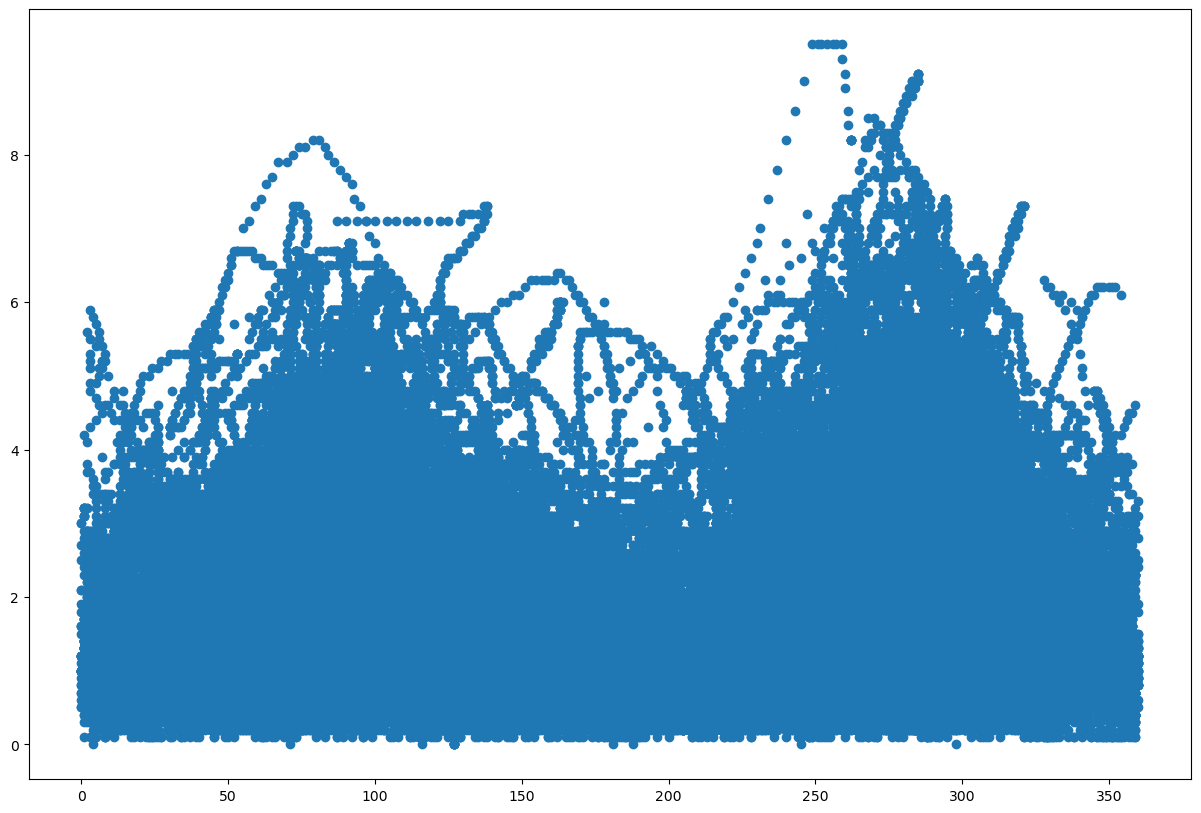

In [9]:
#checking the relation between independent varibles 
plt.figure(figsize=(15,10))
plt.scatter(train['Wind Direction'],train['Wind Speed'])
# it seems like wind speed start increasing to such extent then again decresing so & so forth so here I am classifying wind
# Direction angles in its direction name

In [88]:
def direction(val):
    if val<22.5 and val>337.5:
        return 'North'
    elif val>22.5 and val<67.5:
        return 'North_east'
    elif val > 67.5 and val < 112.5:
        return 'East'
    elif val > 112.5 and val < 157.5:
        return 'South_east'
    elif val > 157.5 and val <202.5:
        return 'South'
    elif val > 202.5 and val < 247.5:
        return 'Soth_west'
    elif val > 247.5 and val < 292.5:
        return 'West'
    elif val > 292.5 and val < 337.5:
        return 'North_west'

train["Direction"] = train['Wind Direction'].apply(direction)
test['Direction'] =  test['Wind Direction'].apply(direction)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'South_east'),
  Text(1, 0, 'South'),
  Text(2, 0, 'East'),
  Text(3, 0, 'Soth_west'),
  Text(4, 0, 'West'),
  Text(5, 0, 'North_west'),
  Text(6, 0, 'North_east')])

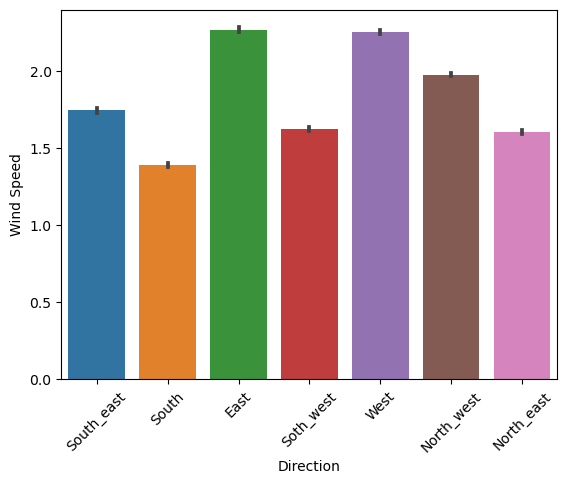

In [34]:
# Checking realtion of wind speed acco to their direction
sns.barplot(x=train['Direction'],y=train['Wind Speed'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'North_west'),
  Text(1, 0, 'West'),
  Text(2, 0, 'North_east'),
  Text(3, 0, 'East'),
  Text(4, 0, 'South_east'),
  Text(5, 0, 'South'),
  Text(6, 0, 'Soth_west')])

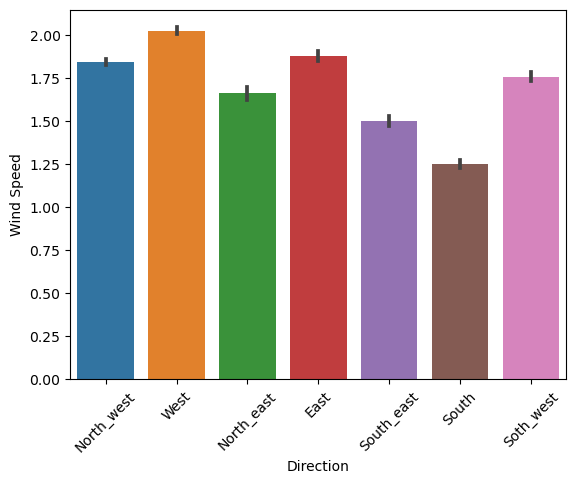

In [35]:
# Checking realtion of wind speed acco to their direction
sns.barplot(x=test['Direction'],y=test['Wind Speed'])
plt.xticks(rotation=45)

In [39]:
train['Fill Flag'].value_counts()

0    192334
5      7651
3      6093
1      4162
Name: Fill Flag, dtype: int64

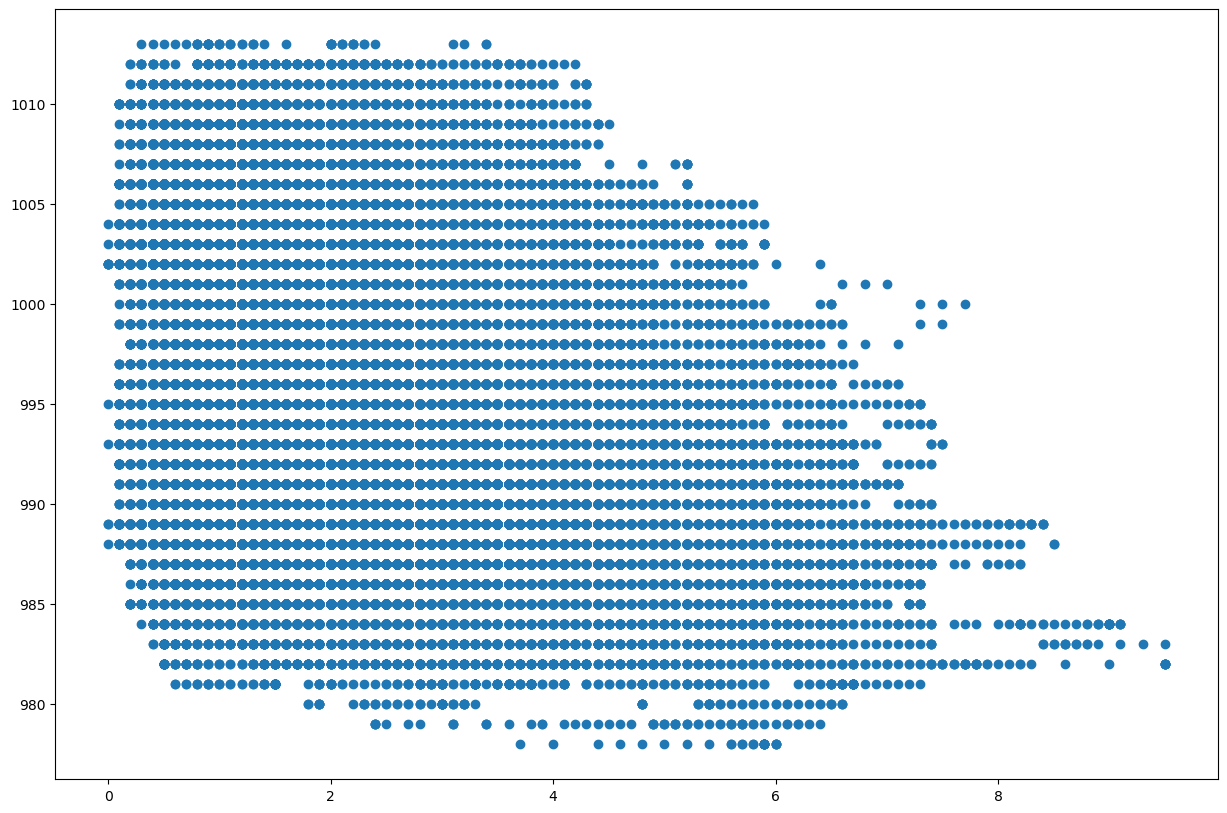

In [8]:
#checking the relation between independent varibles
plt.figure(figsize=(15,10))
plt.scatter(train['Wind Speed'],train['Pressure'])
# Here we can see the inverse relation b/w wind speed & ist pressure as wind speed increases its presure tends to decrease

In [3]:
# Chnaging data type of an object
train['Cloud Type']=train['Cloud Type'].astype('object')
train['Fill Flag']=train['Fill Flag'].astype('object')
test['Cloud Type']=test['Cloud Type'].astype('object')
test['Fill Flag']=test['Fill Flag'].astype('object')


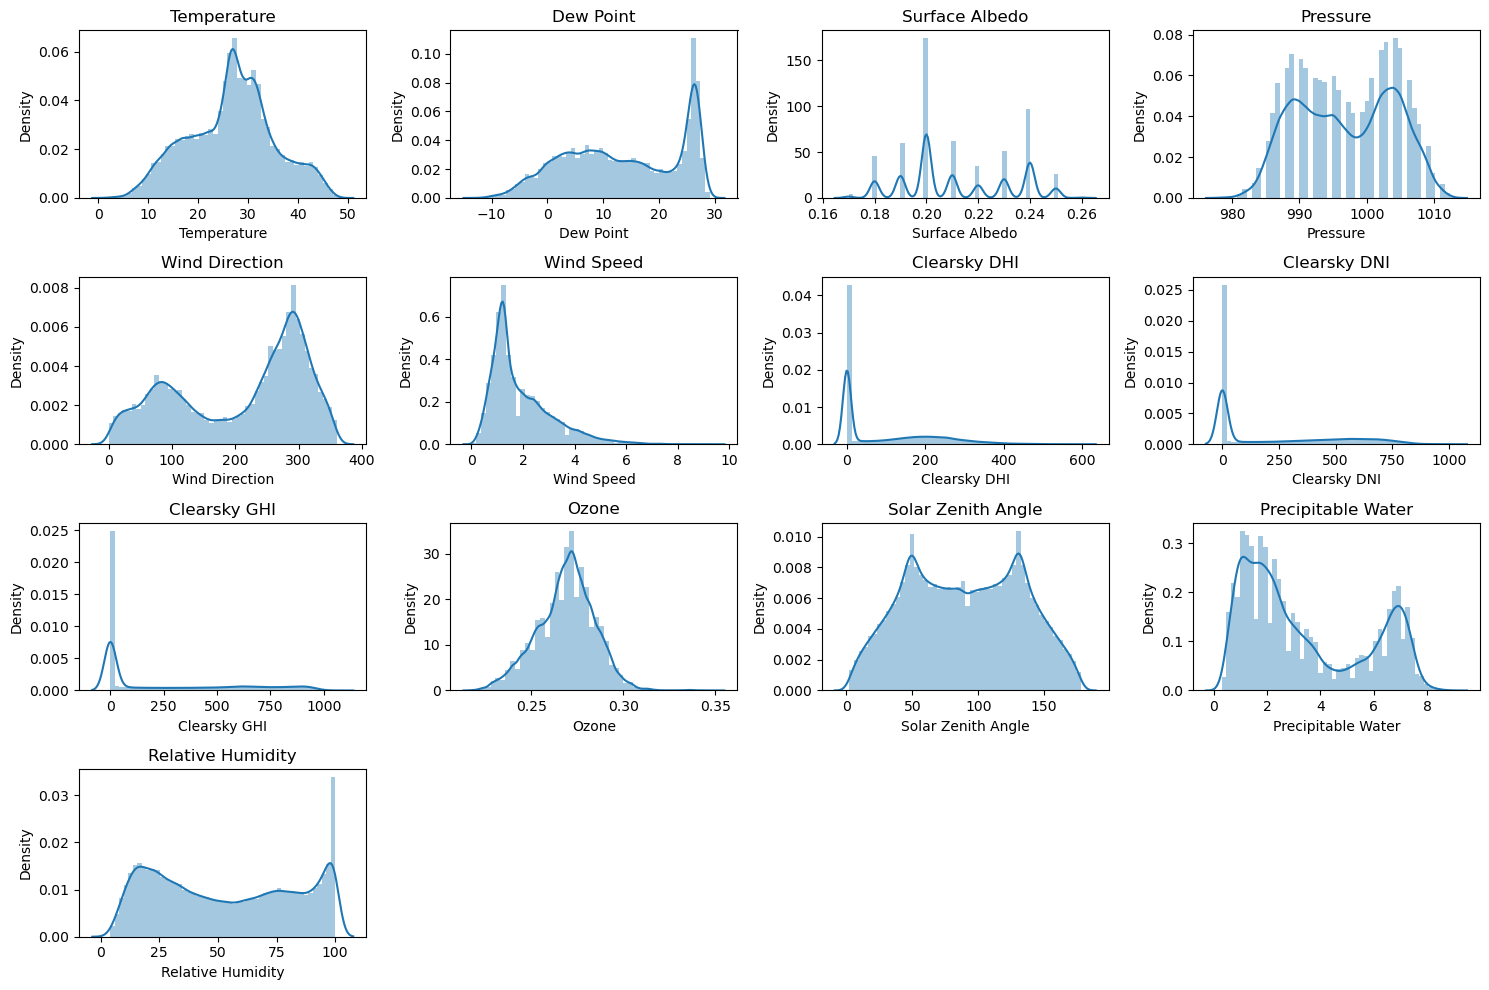

In [9]:
a=4
b=4
c=1
plt.figure(figsize=[15,10])
data=train.select_dtypes(np.number)
for i in data.columns:
    plt.subplot(a,b,c)
    sns.distplot(data.loc[::,i])
    plt.title(i)
    c+=1
plt.tight_layout()
plt.show()

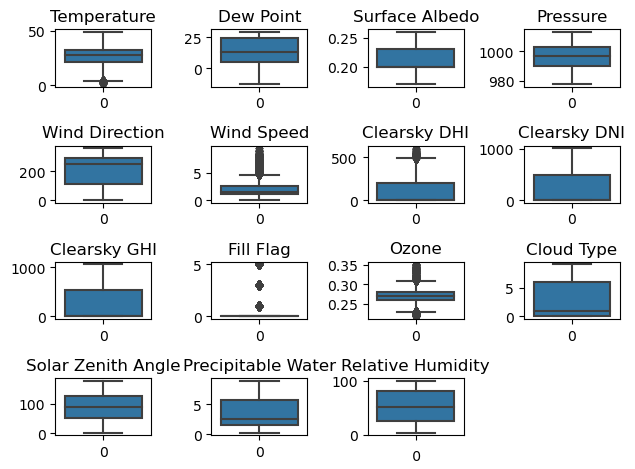

In [40]:
a=4
b=4
c=1
data=train.select_dtypes(np.number)
for i in data.columns:
    plt.subplot(a,b,c)
    sns.boxplot(data.loc[::,i])
    plt.title(i)
    c+=1
plt.tight_layout()
plt.xticks(rotation=180)
plt.show()

<Axes: xlabel='Cloud Type', ylabel='Clearsky GHI'>

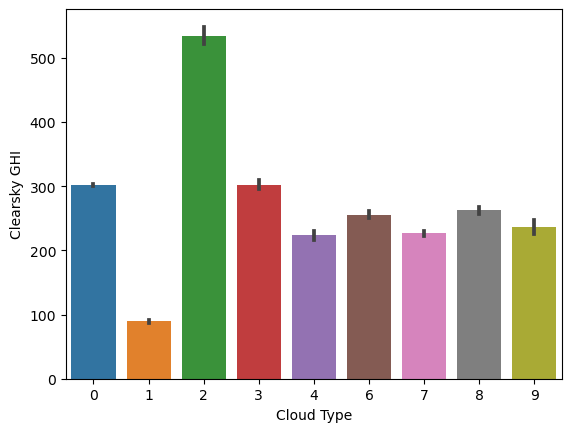

In [11]:
# checking the relation between dependent & independent vairble
sns.barplot(x=train['Cloud Type'],y=train['Clearsky GHI'])

<Axes: xlabel='Cloud Type', ylabel='Clearsky GHI'>

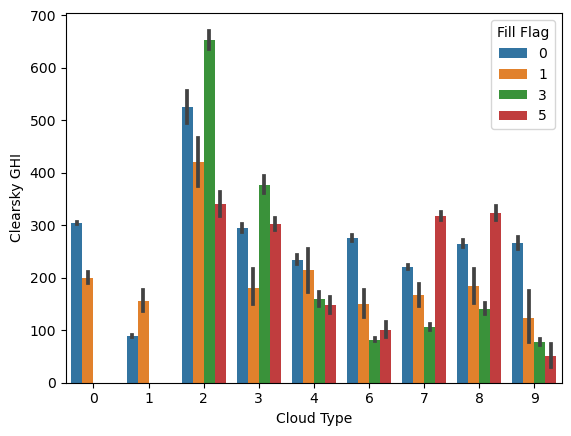

In [12]:
sns.barplot(x=train['Cloud Type'],y=train['Clearsky GHI'],hue=train['Fill Flag'])

<Axes: xlabel='Cloud Type', ylabel='Ozone'>

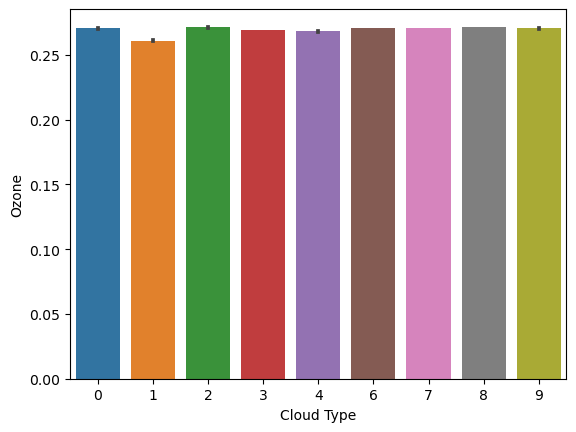

In [13]:
sns.barplot(x=train['Cloud Type'],y=train['Ozone'])

<Axes: xlabel='Cloud Type', ylabel='Clearsky DNI'>

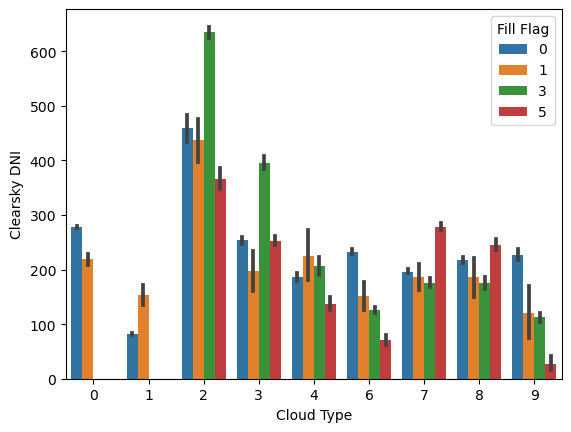

In [14]:
sns.barplot(x=train['Cloud Type'],y=train['Clearsky DNI'],hue=train['Fill Flag'])

<Axes: >

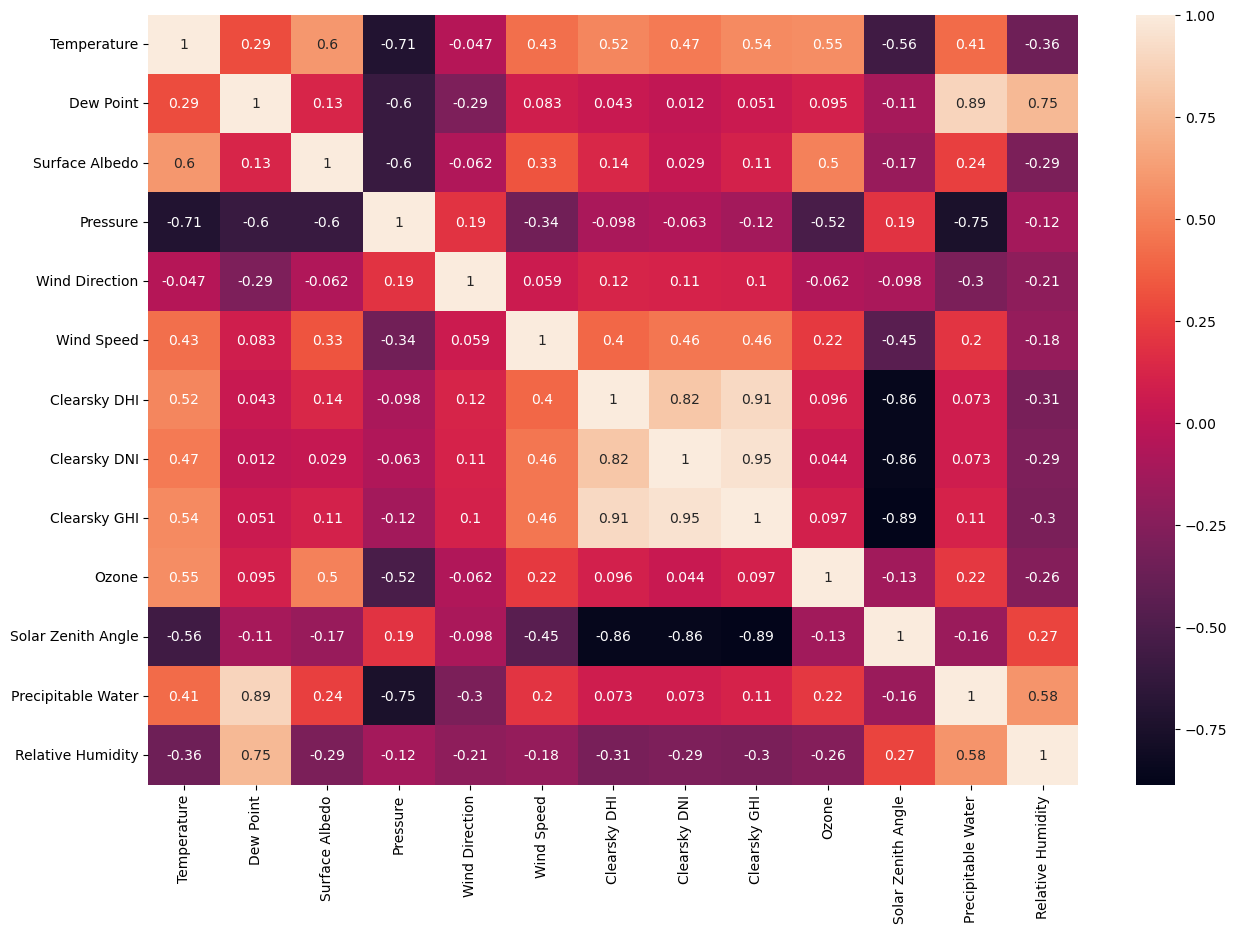

In [15]:
#cheking the relation between independent variables
plt.figure(figsize=[15,10])
sns.heatmap(train.corr(),annot=True)
# here we can see some of the independent variable has high corelation there could be chance of multicolinarity

In [89]:
# Checking is their any multicolinearity because some of simension have high correlation in train
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = train[['Temperature', 'Dew Point', 'Surface Albedo','Pressure',
       'Wind Speed', 'Ozone', 'Solar Zenith Angle', 'Precipitable Water',
       'Relative Humidity']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

#Removing Relative Humidity, Ozone, Surface albedo, pressure, Temperature

              feature         VIF
0         Temperature   83.777185
1           Dew Point   41.750024
2      Surface Albedo  191.576554
3            Pressure  482.856575
4          Wind Speed    5.053122
5               Ozone  479.671383
6  Solar Zenith Angle   10.126273
7  Precipitable Water   18.573152
8   Relative Humidity   59.026634


In [54]:
# Checking is their any multicolinearity because some of simension have high correlation in test dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = test[['Temperature', 'Dew Point', 'Surface Albedo','Pressure',
       'Wind Speed', 'Ozone', 'Solar Zenith Angle', 'Precipitable Water',
       'Relative Humidity']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

              feature         VIF
0         Temperature  145.775594
1           Dew Point   92.207100
2      Surface Albedo  197.322770
3            Pressure  525.452313
4          Wind Speed    4.964427
5               Ozone  389.793394
6  Solar Zenith Angle   10.459711
7  Precipitable Water   35.877901
8   Relative Humidity  125.472980


<Axes: >

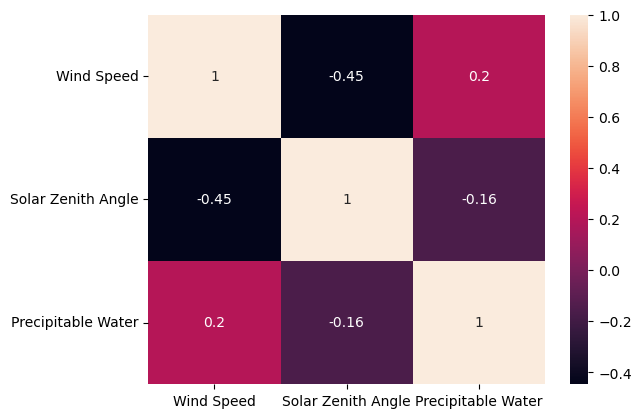

In [62]:
import seaborn as sns
sns.heatmap(train[[ 
       'Wind Speed', 'Solar Zenith Angle', 'Precipitable Water'
       ]] .corr(),annot=True)

In [90]:
train.drop(['Relative Humidity', 'Ozone', 'Surface Albedo', 'Pressure', 'Temperature','Fill Flag'],axis=1,inplace=True)
test.drop(['Relative Humidity', 'Ozone', 'Surface Albedo', 'Pressure', 'Temperature','Fill Flag'],axis=1,inplace=True)

<Axes: xlabel='Direction', ylabel='Clearsky GHI'>

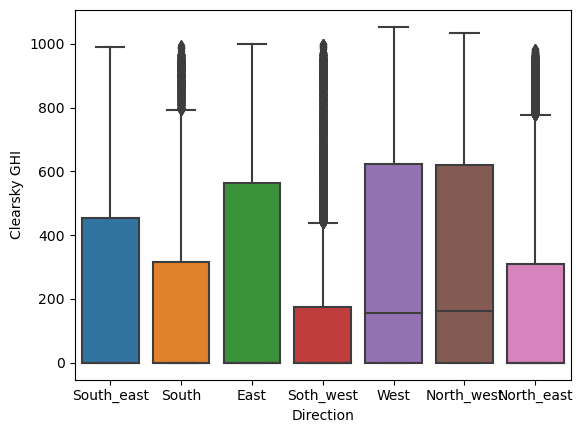

In [41]:
sns.boxplot(x=train['Direction'],y=train['Clearsky GHI'],data=train)

In [91]:
# creating month & year wise data\
year=[]
month=[]
time=[]
for i in train["Timestamp"]:
    year.append(i[0:4])
    month.append(i[5:7])
    time.append(i[11:13])

train["Year"]=year
train['Month']=month
train['Time']=time
train['Time']=train.Time.astype('int64')

In [92]:
year=[]
month=[]
time=[]
for i in test['Timestamp']:
    year.append(i[0:4])
    month.append(i[5:7])
    time.append(i[11:13])

test["Year"]=year
test['Month']=month
test['Time']=time
test['Time']=test.Time.astype('int64')

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Dew Point           210240 non-null  float64
 2   Wind Direction      210240 non-null  float64
 3   Wind Speed          210240 non-null  float64
 4   Clearsky DHI        210240 non-null  int64  
 5   Clearsky DNI        210240 non-null  int64  
 6   Clearsky GHI        210240 non-null  int64  
 7   Fill Flag           210240 non-null  int64  
 8   Cloud Type          210240 non-null  int64  
 9   Solar Zenith Angle  210240 non-null  float64
 10  Precipitable Water  210240 non-null  float64
 11  Direction           194760 non-null  object 
 12  Year                210240 non-null  object 
 13  Month               210240 non-null  object 
 14  Time                210240 non-null  int64  
dtypes: float64(5), int64(6), object(4)

In [70]:
train

Timestamp  Dew Point  Wind Direction  Wind Speed  \
0       2019-01-01 00:00:00        6.9           121.0         1.0   
1       2019-01-01 00:10:00        6.9           122.0         1.0   
2       2019-01-01 00:20:00        6.9           124.0         1.0   
3       2019-01-01 00:30:00        6.9           125.0         1.0   
4       2019-01-01 00:40:00        6.9           126.0         1.0   
...                     ...        ...             ...         ...   
210235  2022-12-31 23:10:00        5.8            54.0         1.2   
210236  2022-12-31 23:20:00        5.8            54.0         1.2   
210237  2022-12-31 23:30:00        5.8            55.0         1.1   
210238  2022-12-31 23:40:00        5.6            55.0         1.1   
210239  2022-12-31 23:50:00        5.6            56.0         1.1   

        Clearsky DHI  Clearsky DNI  Clearsky GHI  Fill Flag  Cloud Type  \
0                  0             0             0          0           1   
1                  0             0             0          0           1   
2                  0             0             0          0           1   
3                  0             0             0          0           1   
4                  0             0             0          0           1   
...              ...           ...           ...        ...         ...   
210235             0             0             0          0           4   
210236             0             0             0          0           7   
210237             0             0             0          0           7   
210238             0             0             0          0           7   
210239             0             0             0          0           7   

        Solar Zenith Angle  Precipitable Water   Direction  Year Month  Time  
0                   173.92                 1.4  South_east  2019    01     0  
1                   171.79                 1.3  South_east  2019    01     0  
2                   169.59                 1.3  South_east  2019    01     0  
3                   167.37                 1.3  South_east  2019    01     0  
4                   165.13                 1.3  South_east  2019    01     0  
...                    ...                 ...         ...   ...   ...   ...  
210235              173.77                 1.8  North_east  2022    12    23  
210236              175.77                 1.8  North_east  2022    12    23  
210237              177.31                 1.8  North_east  2022    12    23  
210238              177.36                 1.8  North_east  2022    12    23  
210239              175.87                 1.8  North_east  2022    12    23  

[210240 rows x 15 columns]

In [93]:
            
def time(x):
    if (x > 5 and x <12):
        return 'morning'
    elif (x>=12 and x<16):
        return "noon"
    elif (x >= 16 and x<=19) :
        return 'Evening'
    else:
        return 'midnight'
train['Daytime']=train['Time'].apply(time)
test['Daytime']=test['Time'].apply(time)

In [73]:
train.Daytime.unique()
test.Daytime.unique()

array(['midnight', 'morning', 'noon', 'Evening'], dtype=object)

<Axes: xlabel='Daytime', ylabel='Clearsky GHI'>

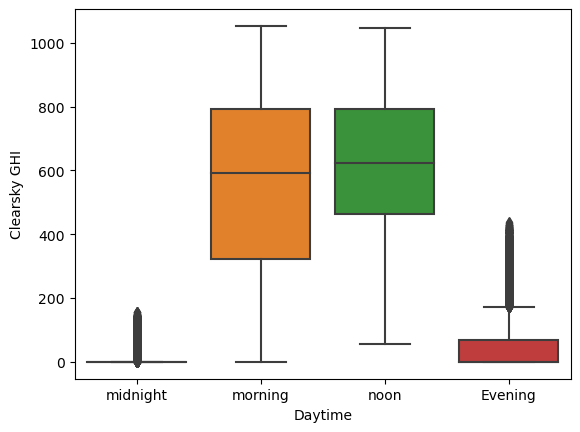

In [74]:
sns.boxplot(x=train['Daytime'],y=train['Clearsky GHI'],data=train)
# here we can see that in midnight & Evening there is irradiance wo we need to for DNI & DHI

<Axes: xlabel='Daytime', ylabel='Clearsky DHI'>

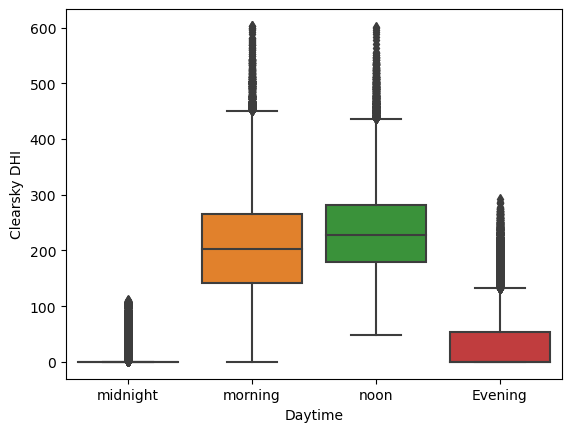

In [26]:
sns.boxplot(x=train['Daytime'],y=train['Clearsky DHI'],data=train)


<Axes: xlabel='Daytime', ylabel='Clearsky DNI'>

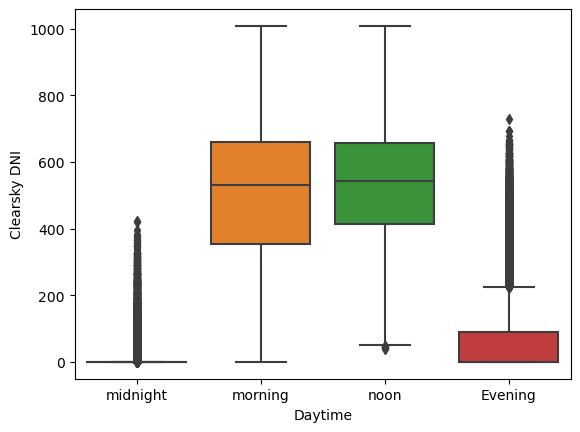

In [27]:
sns.boxplot(x=train['Daytime'],y=train['Clearsky DNI'],data=train)


In [75]:
#train[train.isin(["Daytime"=="Midnight"])]
pd.set_option("display.max_rows",None)
train[(train['Daytime']=='midnight') & (train['Clearsky DNI']>0)]
#train[(train.Daytime.isin(['midnight'])) & (train['Clearsky DNI']>1 )]

Timestamp  Dew Point  Wind Direction  Wind Speed  \
10259   2019-03-13 05:50:00       16.4            67.0         2.2   
10403   2019-03-14 05:50:00       18.1           139.0         1.6   
10547   2019-03-15 05:50:00       15.3           202.0         1.0   
10691   2019-03-16 05:50:00        4.5           276.0         3.1   
10835   2019-03-17 05:50:00        5.1           256.0         1.4   
10979   2019-03-18 05:50:00        6.6           162.0         1.9   
11123   2019-03-19 05:50:00        9.8           114.0         1.6   
11267   2019-03-20 05:50:00        9.8           264.0         0.5   
11411   2019-03-21 05:50:00        8.6           336.0         2.6   
11555   2019-03-22 05:50:00       -0.3           297.0         4.0   
11698   2019-03-23 05:40:00       -4.6           280.0         2.8   
11699   2019-03-23 05:50:00       -4.6           279.0         3.1   
11842   2019-03-24 05:40:00       -1.6           238.0         1.2   
11843   2019-03-24 05:50:00       -1.6           238.0         1.2   
11986   2019-03-25 05:40:00       -1.2           183.0         1.1   
11987   2019-03-25 05:50:00       -1.2           185.0         1.1   
12130   2019-03-26 05:40:00        0.6           156.0         1.2   
12131   2019-03-26 05:50:00        0.6           158.0         1.2   
12274   2019-03-27 05:40:00        1.2           300.0         1.6   
12275   2019-03-27 05:50:00        1.2           297.0         1.7   
12418   2019-03-28 05:40:00       13.6           256.0         1.2   
12419   2019-03-28 05:50:00       13.6           261.0         1.3   
12562   2019-03-29 05:40:00       -2.3           323.0         0.4   
12563   2019-03-29 05:50:00       -2.3           314.0         0.4   
12706   2019-03-30 05:40:00        0.7           198.0         1.5   
12707   2019-03-30 05:50:00        0.7           200.0         1.6   
12850   2019-03-31 05:40:00        1.6           270.0         0.6   
12851   2019-03-31 05:50:00        1.6           264.0         0.7   
12994   2019-04-01 05:40:00        2.0           204.0         1.7   
12995   2019-04-01 05:50:00        2.1           204.0         1.8   
13138   2019-04-02 05:40:00        4.2           119.0         2.1   
13139   2019-04-02 05:50:00        4.2           121.0         2.3   
13281   2019-04-03 05:30:00        7.1           138.0         1.6   
13282   2019-04-03 05:40:00        7.2           139.0         1.7   
13283   2019-04-03 05:50:00        7.2           141.0         1.9   
13425   2019-04-04 05:30:00        8.5           181.0         1.2   
13426   2019-04-04 05:40:00        8.8           186.0         1.3   
13427   2019-04-04 05:50:00        8.8           190.0         1.4   
13569   2019-04-05 05:30:00        4.6           281.0         1.5   
13570   2019-04-05 05:40:00        4.1           279.0         1.6   
13571   2019-04-05 05:50:00        4.1           276.0         1.8   
13713   2019-04-06 05:30:00        9.3           267.0         4.0   
13714   2019-04-06 05:40:00        9.9           266.0         4.2   
13715   2019-04-06 05:50:00        9.9           265.0         4.4   
13857   2019-04-07 05:30:00        5.7           211.0         1.1   
13858   2019-04-07 05:40:00        5.8           211.0         1.2   
13859   2019-04-07 05:50:00        5.8           210.0         1.3   
14001   2019-04-08 05:30:00        7.6           176.0         0.7   
14002   2019-04-08 05:40:00        7.6           182.0         0.8   
14003   2019-04-08 05:50:00        7.6           187.0         0.9   
14145   2019-04-09 05:30:00        5.9           346.0         1.0   
14146   2019-04-09 05:40:00        5.7           343.0         1.1   
14147   2019-04-09 05:50:00        5.7           339.0         1.1   
14289   2019-04-10 05:30:00        1.4           329.0         1.3   
14290   2019-04-10 05:40:00        1.5           329.0         1.3   
14291   2019-04-10 05:50:00        1.5           329.0         1.4   
14433   2019-04-11 05:30:00 

<Axes: xlabel='Month', ylabel='Clearsky GHI'>

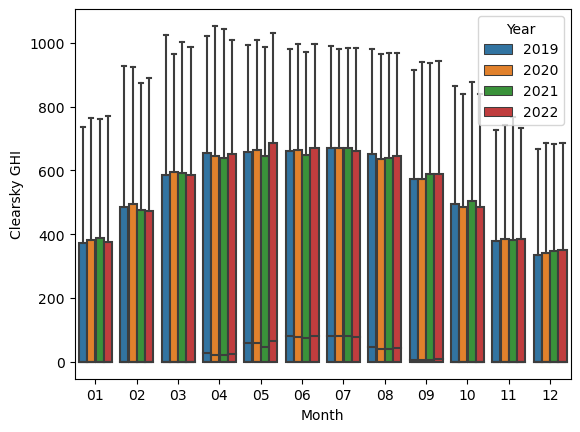

In [29]:
sns.boxplot(x=train['Month'],y=train['Clearsky GHI'],data=train,hue=train['Year'])

<Axes: xlabel='Year', ylabel='Clearsky GHI'>

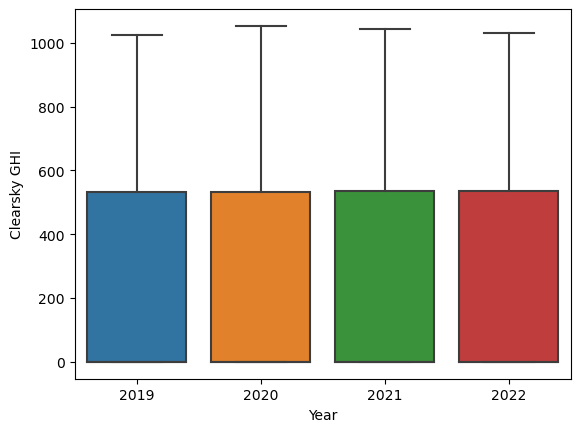

In [30]:
sns.boxplot(x=train['Year'],y=train['Clearsky GHI'],data=train)

In [41]:
test

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0      2023-01-01 00:00:00         11.3        1.6            0.21      1006   
1      2023-01-01 00:10:00         11.2        1.6            0.21      1006   
2      2023-01-01 00:20:00         11.1        1.6            0.21      1006   
3      2023-01-01 00:30:00         11.0        1.6            0.21      1006   
4      2023-01-01 00:40:00         10.9        1.2            0.21      1006   
...                    ...          ...        ...             ...       ...   
52555  2023-12-31 23:10:00         11.7        2.0            0.21      1006   
52556  2023-12-31 23:20:00         11.6        2.0            0.21      1006   
52557  2023-12-31 23:30:00         11.5        2.0            0.21      1006   
52558  2023-12-31 23:40:00         11.4        1.6            0.21      1006   
52559  2023-12-31 23:50:00         11.3        1.6            0.21      1006   

       Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0                 305         1.2           NaN           NaN           NaN   
1                 306         1.2           NaN           NaN           NaN   
2                 306         1.2           NaN           NaN           NaN   
3                 307         1.2           NaN           NaN           NaN   
4                 307         1.2           NaN           NaN           NaN   
...               ...         ...           ...           ...           ...   
52555             303         1.2           NaN           NaN           NaN   
52556             303         1.2           NaN           NaN           NaN   
52557             304         1.2           NaN           NaN           NaN   
52558             304         1.2           NaN           NaN           NaN   
52559             305         1.2           NaN           NaN           NaN   

       ...  Ozone  Cloud Type Solar Zenith Angle  Precipitable Water  \
0      ...  0.255           0             173.92                 1.4   
1      ...  0.255           0             171.79                 1.4   
2      ...  0.255           0             169.59                 1.4   
3      ...  0.255           0             167.37                 1.4   
4      ...  0.255           0             165.13                 1.4   
...    ...    ...         ...                ...                 ...   
52555  ...  0.254           0             173.67                 1.4   
52556  ...  0.254           0             175.68                 1.4   
52557  ...  0.254           0             177.23                 1.4   
52558  ...  0.254           0             177.34                 1.4   
52559  ...  0.254           0             175.90                 1.4   

       Relative Humidity   Direction  Year Month Time   Daytime  
0                  51.38  North west  2023    01    0  midnight  
1                  51.72  North west  2023    01    0  midnight  
2                  52.06  North west  2023    01    0  midnight  
3                  52.41  North west  2023    01    0  midnight  
4                  51.34  North west  2023    01    0  midnight  
...                  ...         ...   ...   ...  ...       ...  
52555              51.26  North west  2023    12   23  midnight  
52556              51.60  North west  2023    12   23  midnight  
52557              51.94  North west  2023    12   23  midnight  
52558              51.04  North west  2023    12   23  midnight  
52559              51.38  North west  2023    12   23  midnight  

[52560 rows x 21 columns]

In [94]:
cat=train.select_dtypes("object").drop(["Timestamp","Year"],axis=1)
num=train.select_dtypes("number").drop(['Time','Clearsky DHI',"Clearsky DNI","Clearsky GHI"],axis=1)
xcat=test.select_dtypes("object").drop(["Timestamp","Year"],axis=1)
xnum=test.select_dtypes("number").drop(['Time','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],axis=1)

In [95]:
ecat=pd.get_dummies(cat,drop_first=True)
testdumy=pd.get_dummies(xcat,drop_first=True)

In [96]:
sc=StandardScaler()
nst=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
testsc=pd.DataFrame(sc.fit_transform(xnum),columns=xnum.columns)
train_scaled=pd.concat([ecat,nst],axis=1)
test_scaled=pd.concat([testdumy,testsc],axis=1)
ytrain=train[['Clearsky DHI',"Clearsky DNI","Clearsky GHI"]]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr=LinearRegression()
a=lr.fit(train_scaled,ytrain).predict(test_scaled)
lrsol=pd.DataFrame(data=a,columns=['Clearsky DHI',"Clearsky DNI","Clearsky GHI"])
lrsol.to_csv('lrrenew.csv',index=False)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model=rf.fit(train_scaled,ytrain)
rfpred=model.predict(test_scaled)
lrsol=pd.DataFrame(data=rfpred,columns=['Clearsky DHI',"Clearsky DNI","Clearsky GHI"])
lrsol.to_csv('rfrenew.csv',index=False)

In [61]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xgprd=xg.fit(train_scaled,ytrain).predict(test_scaled)
lrsol=pd.DataFrame(data=xgprd,columns=['Clearsky DHI',"Clearsky DNI","Clearsky GHI"])
lrsol.to_csv('xgbrenew.csv',index=False)

In [16]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
prd=mlp.fit(train_scaled,ytrain).predict(test_scaled)
lrsol=pd.DataFrame(data=prd,columns=['Clearsky DHI',"Clearsky DNI","Clearsky GHI"])
lrsol.to_csv('solar.csv',index=False)


In [65]:
pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install lightgbm

In [85]:
import lightgbm as lgb
lgb=lgb.LGBMRegressor()
lgprd=lgb.fit(train_scaled,ytrain).predict(test_scaled)
lrsol=pd.DataFrame(data=lgbprd,columns=['Clearsky DHI',"Clearsky DNI","Clearsky GHI"])
lrsol.to_csv('lgb.csv',index=False)


ValueError: DataFrame for label cannot have multiple columns

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer

# Sample DataFrame with a single column containing missing values
data = {
    'Feature1': [1, 2, None, 4, 5],
}

df = pd.DataFrame(data)

# Initialize the KNNImputer with the number of neighbors (k) and any other parameters
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in the 'Feature1' column
df['Feature1'] = imputer.fit_transform(df[['Feature1']])

# Display the DataFrame with imputed values
print(df)

   Feature1
0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
